# Métodos de Aprendizaje Automático
## Por: Luis Alberto Chavarría Zamora

### Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

Este dataset es aportado por la división de recursos marinos de los laboratorios de recursos marinos de Taroona en Department of Primary Industry and Fisheries, Tasmania. Los datos son del año 1995. 

Estos datos son utilizados para predecir la edad del abalone, un tipo de molusco que en español se conocen como orejas de mar o abulones, es un ser vivo con carne altamente estimada y ampliamente consumida en la Asia Oriental, Estados Unidos y México. La edad del abalone es predicha a partir mediciones físicas donde se corta el cono y se cuentan el número de anillos en un microscopio, esta tarea se indica que consume mucho tiempo y es bastante aburrida al parecer. Por estas razones es necesario métodos más sencillos de obtener como el clima de la zona, el lugar. La base de datos ya fue procesada para eliminar datos faltantes.

Este problema es de clasificación donde se debe clasificar datos como: sexo, largo, diametro, altura, peso absoluto, peso de su carne, peso de la viscera después de haber sangrado, peso de la concha después de haber sido secada. Luego, con estos datos se debe obtener el número de anillos. Se tienen 4177 datos con rango de 1~29, excepto 28, los cuales tienen una distribución bastante similar a una gausiana o normal, donde en los límites se observan valores inferiores al centro.

Estos datos ya han sido procesados por otras fuentes, sin embargo han tenido resultados poco alentadores como por ejemplo:

- Sam Waugh (1995) "Extending and benchmarking Cascade-Correlation", PhD thesis, Computer Science Department, University of Tasmania. Usaron 3133 datos entrenamiento y 1044 de prueba. Se usaron métodos de inteligencia artificial como redes neuronales y otros como knn de las siguiente manera:

 - Cascade-Correlation (no hidden nodes) con 24.86% de acierto.
 - Cascade-Correlation (5 hidden nodes) con 26.25% de acierto.
 - C4.5 con 21.5% de acierto.
 - knn con k=5 con un 3.57%.
 
- David Clark, Zoltan Schreter, Anthony Adams "A Quantitative Comparison of Dystal and Backpropagation", submitted to the Australian Conference on Neural Networks (ACNN'96). En este el conjunto de datos fue agrupado en tres categorías de clasificación: 1~8 anillos; 9 y 10; y finalmente de 11 en adelante. Se usaron los siguientes algoritmos:

 - Backprop con 64% de acierto.
 - Dystal con 55% de acierto.
 - Cascade-Correlation (no hidden nodes) con 61.40% de acierto.
 - Cascade-Correlation (5 hidden nodes) con 65.61% de acierto.
 - C4.5 con 59.2% de acierto.
 - knn con k=5, acertando un 62.46%
 
### A través del análisis de las curvas se verá a continuación que el mejor valor para evitar overfitting o underfitting es con una distribución de datos de entrenamiento de 75% y 25% para prueba o dicho de otra forma 3133 de entrenamiento y 1044 de prueba.
 
En este documento se intentaron mejorar las predicciones con metodos de aprendizaje supervisado, sin agrupar los anillos, sino individualmente, tratando de predecir el número de anillos. Se espera mejorar los resultados mostrados anteriormente.

# Preprocesamiento de datos

En esta etapa se cargan los datos y se acondicionan. Los datos tienen valores continuos, excepto el sexo que lo clasifican entre M, F y I, que significan masculino, femenino e infante, respectivamente

In [1]:
#Se cargan las bibliotecas necesarias para el trabajo
from sklearn import preprocessing
import matplotlib
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Se apagan los warnings para evitar las alertas de posibles cambios de versión en Python3
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

#Dirección del set de datos.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
# Se carga el dataset como un csv, a continuación se muestran los datos de cada columna
df = pd.read_csv(url, names=['sex','length','diameter','height','whole height','shucked weight',
                             'viscera weight','shell weight','rings'])
#Se imprimen las primeras 10 filas de información importada.

# Se indican el significado de cada columna o feature
features = ['sex','length','diameter','height','whole height','shucked weight','viscera weight','shell weight']

# Se separan los datos cargados en atributos (x) y clases (y)
x = df.loc[:,features].values
y = df.loc[:,['rings']].values
# Se usa ravel para colocar los datos en una sola columna
y = y.ravel()

Como los datos de sexo son letras, es necesario utilizar un label encoder para que lo coloque ordinalmente, para que por ejemplo sea: M -> 1, F -> 2 e I -> 3.

In [2]:
le = preprocessing.LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])

Como se indicó previamente, los datos a simple vista tienen una distribución normal o gausiana, por esta razón se utilizan un escalamiento estándar.

In [3]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
# Aparece un warning pues la información se convirtió al tipo float64

Se va a realizar un preprocesado a través de PCA para disminuir las dimensiones a analizar (conseguir menos de 8).

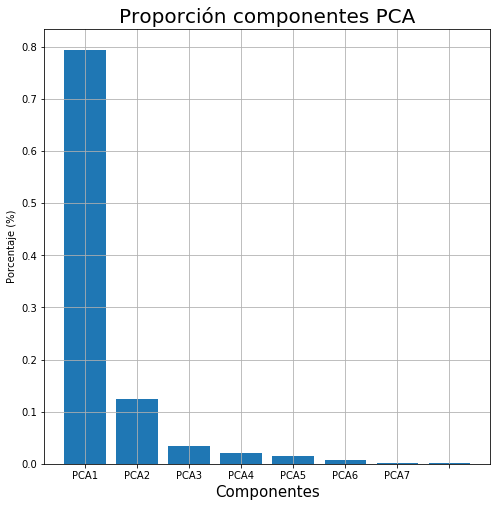

In [4]:
# Se extraen todas las componentes de los datos, que son 8
n_atributes = x.shape[1]

# Se extrae el PCA y se introducen en los datos
pca = PCA(n_components = n_atributes)
principalComponents = pca.fit_transform(x)

# Nombra cada una de las componentes del PCA
pca_features = ['PCA' + str(i) for i in range(n_atributes)]
principalDf = pd.DataFrame(data = principalComponents, columns = pca_features)

# Grafica los datos
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
#Grafica las componentes de PCA según su porcentaje
ax.bar(range(n_atributes),pca.explained_variance_ratio_)
ax.set_xlabel('Componentes', fontsize = 15)
ax.set_xticklabels(pca_features)
ax.set_ylabel('Porcentaje (%)')
ax.set_title('Proporción componentes PCA',fontsize = 20)
ax.grid()

Se puede ver que las componentes más importantes del PCA son las dos primeras, pues entre ambas pueden representar cerca del 90% de los datos, como se ve a continuación con la suma acumulativa:

In [5]:
print(pca.explained_variance_ratio_.cumsum())

[0.7945299  0.91958372 0.9544069  0.97530572 0.98953509 0.99757707
 0.99916792 1.        ]


Se procede a graficar los datos

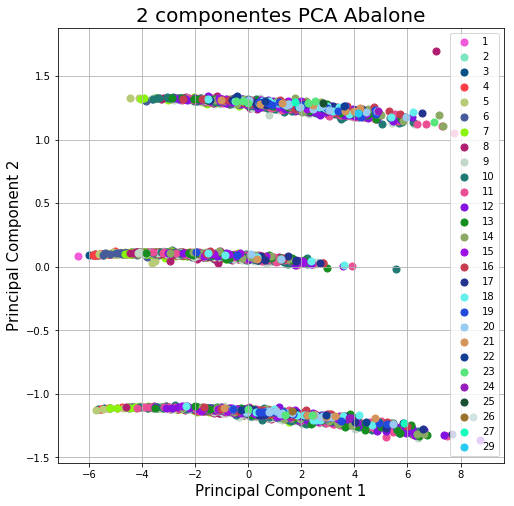

In [6]:
from sklearn.utils import column_or_1d
# Se escoge graficar solo dos componentes
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents)

le = preprocessing.LabelEncoder()
le.fit(df[['rings']])
targets = le.classes_.ravel()

#Se concatenan las componentes de PCA con los targets
finalDf = pd.concat([principalDf, df[['rings']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 componentes PCA Abalone', fontsize = 20)

# Para agrupar en colores los resultados se recorren todos los targets (29)
for target in targets:
    # Busca los indices que sean iguales al target
    indices = finalDf['rings'] == target
    # Grafica los puntos encontrados con un color aleatorio, pero igual para los del mismo target
    ax.scatter(finalDf.loc[indices, 0]
               , finalDf.loc[indices, 1]
               , c = np.random.rand(3,)
               , s = 50)
    
#Se enciende el grid y se muestra que significa cada color
ax.legend(targets)
ax.grid()

Se puede ver que hay tres grupos bien definidos, más sin embargo, dentro de sí mismos tienen mezclados varios puntos, a continuación se va a comparar el rendimiento que tiene este preprocesamiento contra las 8 componentes procesadas a través de algunos métodos de aprendizaje automático.

# Métodos de aprendizaje automático

A continuación se van a dividir los datos en datos de entrenamiento y datos para comprobación. Se van a usar la misma proporción de datos que en las investigaciones anteriores, sin embargo se va a analizar el número de datos a utilizar para evaluar si existe overfitting o underfitting

In [7]:
from sklearn.cross_validation import train_test_split

# Se van a tener 2 set de entrenamiento y prueba, donde los primeros son sin preprocesamiento PCA 
# y los otros con preprocesamiento PCA. Se usa el random_state para asegurar que se usen los mismos
# datos al ser generados por la misma llave.

# Se dividen los datos, donde un 25% son de prueba y el resto de entrenamiento para manejar la misma
# proporción de datasets con respecto a las investigaciones.

# Datos sin preprocesamiento PCA.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=50)

x_pca = principalDf
y_pca = df[['rings']]

# Datos con preprocesamiento PCA.
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(x_pca, y_pca, test_size=0.25
                                                                    ,random_state=50)

/home/luis/miniconda3/envs/py3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
# Función para plotear la curva de aprendizaje
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 20)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## KNN

A continuación se calcula la curva de aprendizaje de los datos con el método de KNN, donde se nota que alrededor de 3000 o más.

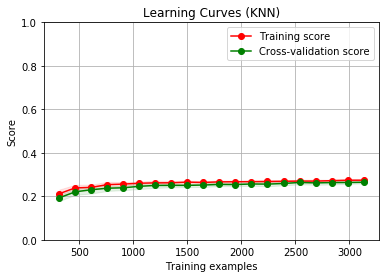

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Se usan 200 vecinos porque fue el que dio mejores resultados
knn = KNeighborsClassifier(n_neighbors=200,algorithm = 'auto')

title = "Learning Curves (KNN)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
estimator = knn
plot_learning_curve(estimator, title, x, y, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

KeyboardInterrupt: 

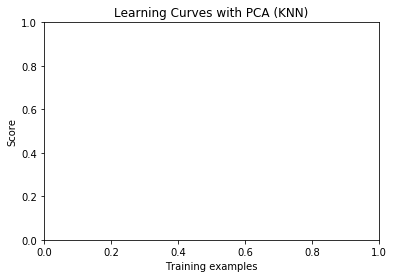

In [10]:
title = "Learning Curves with PCA (KNN)"
plot_learning_curve(estimator, title, x_pca, y_pca, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
# Se entrena el modelo
knn.fit(X_train, y_train)

# Se predice la efectividad de la precisión
pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score

# Se entrena el modelo con PCA
knn.fit(X_train_PCA, y_train_PCA)

# Se predice la efectividad de la precisión con PCA
pred_pca = knn.predict(X_test_PCA)

# Se evalua la precisión
print('Puntaje de precisión \n \n \t Sin preprocesamiento PCA:'
      ,accuracy_score(y_test, pred),'\n \t Con preprocesamiento PCA:'
      ,accuracy_score(y_test_PCA, pred_pca))

Se nota que con preprocesamiento PCA hay mejores resultados, pero no significativamente.

# Decission Tree

Se nota que el balanceo de los datos mejora con el número de datos de entrenamiento, notándose que con más de 3000 datos se alcanza el mejor desempeño del método de aprendizaje automático.

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth = 6)
# Si se balancea baja el porcentaje a 8%, el presort no tiene efecto, el balanceo de peso reduce el puntaje

title = "Learning Curves (Decision Trees)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
estimator = dt
plot_learning_curve(estimator, title, x, y, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
title = "Learning Curves with PCA (Decision Trees)"
plot_learning_curve(estimator, title, x_pca, y_pca, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
dt.fit(X_train, y_train)

# predict the response
pred = dt.predict(X_test)

# Se entrena el modelo con PCA
dt.fit(X_train_PCA, y_train_PCA)

# Se predice la efectividad de la precisión con PCA
pred_pca = dt.predict(X_test_PCA)

# Se evalua la precisión
print('Puntaje de precisión \n \n \t Sin preprocesamiento PCA:'
      ,accuracy_score(y_test, pred),'\n \t Con preprocesamiento PCA:'
      ,accuracy_score(y_test_PCA, pred_pca))

Se ve que el rendimiento mejora poco significativamente cuando se le aplica PCA previamente.

# Random Forest

Se nota que los datos convergen al mejor balanceo por alrededor de más de 3000.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=6, random_state=50)
# La mejor predicción es alcanzada cuando la profundidad es de 6, entre los valores probados de llave para
# la generación aleatoria de ordenamiento 50 fue el mejor. El balanceo disminuye el rendimiento

title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
estimator = rf
plot_learning_curve(estimator, title, x, y, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
title = "Learning Curves with PCA (Random Forest)"
plot_learning_curve(estimator, title, x_pca, y_pca, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
rf.fit(X_train, y_train)

# predict the response
pred = rf.predict(X_test)

# Se entrena el modelo con PCA
rf.fit(X_train_PCA, y_train_PCA)

# Se predice la efectividad de la precisión con PCA
pred_pca = rf.predict(X_test_PCA)

# Se evalua la precisión
print('Puntaje de precisión \n \n \t Sin preprocesamiento PCA:'
      ,accuracy_score(y_test, pred),'\n \t Con preprocesamiento PCA:'
      ,accuracy_score(y_test_PCA, pred_pca))

Se ve que el rendimiento es del 27% es el mejor resultado cuando los datos no han sido preprocesados por PCA.

# Naive Bayes

## Gaussiano

Se nota que los valores tienen un buen balanceo después de 2250, alrededor de un poco más de 3000 se logran los mejores resultados.

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# La mejor predicción es alcanzada cuando la profundidad es de 6, entre los valores probados de llave para
# la generación aleatoria de ordenamiento 50 fue el mejor. El balanceo disminuye el rendimiento
title = "Learning Curves (Naive Bayes Gaussiano)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
estimator = gnb
plot_learning_curve(estimator, title, x, y, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
title = "Learning Curves with PCA (Naive Bayes Gaussiano)"
plot_learning_curve(estimator, title, x_pca, y_pca, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
gnb.fit(X_train, y_train)

# predict the response
pred = gnb.predict(X_test)

# Se entrena el modelo con PCA
gnb.fit(X_train_PCA, y_train_PCA)

# Se predice la efectividad de la precisión con PCA
pred_pca = gnb.predict(X_test_PCA)

# Se evalua la precisión
print('Puntaje de precisión \n \n \t Sin preprocesamiento PCA:'
      ,accuracy_score(y_test, pred),'\n \t Con preprocesamiento PCA:'
      ,accuracy_score(y_test_PCA, pred_pca))

Se dice que por medio de preprocesamiento de PCA se consiguen los mejores resultados de alrededor de 26.8%.

## Bernoulli

Se nota que los valores convergen al mejor balanceo después de 2250.

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
# Los cambios en alpha no son muy efectivos, sigue manteniendo el rendimiento, los demás parámetros no son muy
# efectivos
title = "Learning Curves (Naive Bayes Bernoulli)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
estimator = bnb
plot_learning_curve(estimator, title, x, y, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
title = "Learning Curves with PCA (Naive Bayes Bernoulli)"
plot_learning_curve(estimator, title, x_pca, y_pca, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
bnb.fit(X_train, y_train)

# predict the response
pred = bnb.predict(X_test)

# Se entrena el modelo con PCA
bnb.fit(X_train_PCA, y_train_PCA)

# Se predice la efectividad de la precisión con PCA
pred_pca = bnb.predict(X_test_PCA)

# Se evalua la precisión
print('Puntaje de precisión \n \n \t Sin preprocesamiento PCA:'
      ,accuracy_score(y_test, pred),'\n \t Con preprocesamiento PCA:'
      ,accuracy_score(y_test_PCA, pred_pca))

Se nota que sin preprocesamiento PCA hay un mejor resultado en el puntaje.

# SVM

## SVC con Kernel Lineal

Se nota que los valores convergen al mejor balanceo después de 3000 datos de entrenamiento.

In [ ]:
from sklearn import svm
svm = svm.SVC(kernel = 'linear', C = 1, gamma = 'auto')
# Los cambios en el parámetro C o gamma no cambian el puntaje de la muestra

title = "Learning Curves (SVM con Kernel Lineal)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
estimator = svm
plot_learning_curve(estimator, title, x, y, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
title = "Learning Curves with PCA (SVM con Kernel Lineal)"
plot_learning_curve(estimator, title, x_pca, y_pca, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
svm.fit(X_train, y_train)

# predict the response
pred = svm.predict(X_test)

# Se entrena el modelo con PCA
svm.fit(X_train_PCA, y_train_PCA)

# Se predice la efectividad de la precisión con PCA
pred_pca = svm.predict(X_test_PCA)

# Se evalua la precisión
print('Puntaje de precisión \n \n \t Sin preprocesamiento PCA:'
      ,accuracy_score(y_test, pred),'\n \t Con preprocesamiento PCA:'
      ,accuracy_score(y_test_PCA, pred_pca))

Se observa que los mejores valores son alcanzados cuando no se realizó el preprocesamiento con PCA.

## SVM con Kernel RBF

Se nota que el puntaje de entrenamiento y prueba mejoran con más datos de entrenamiento.

In [ ]:
from sklearn import svm
svm = svm.SVC(kernel='rbf', C = 0.1, gamma = 0.5)
# Los cambios en el parámetro C no cambian el puntaje de la muestra sustancialmente.
# Interesantemente, con un gamma de 0.5 se obtiene el mismo porcentaje de rendimiento y mejor
title = "Learning Curves (SVM con Kernel RBF)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
estimator = svm
plot_learning_curve(estimator, title, x, y, ylim=(0.0, 1.0), cv=cv, n_jobs=4)
plt.show()

In [ ]:
title = "Learning Curves with PCA (SVM con Kernel RBF)"
plot_learning_curve(estimator, title, x_pca, y_pca, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
svm.fit(X_train, y_train)

# predict the response
pred = svm.predict(X_test)

# Se entrena el modelo con PCA
svm.fit(X_train_PCA, y_train_PCA)

# Se predice la efectividad de la precisión con PCA
pred_pca = svm.predict(X_test_PCA)

# Se evalua la precisión
print('Puntaje de precisión \n \n \t Sin preprocesamiento PCA:'
      ,accuracy_score(y_test, pred),'\n \t Con preprocesamiento PCA:'
      ,accuracy_score(y_test_PCA, pred_pca))

Se observa que los mejores resultados se obtienen cuando se realiza preprocesamiento PCA.

## SVM con Kernel Polinomial

Se nota que los datos convergen al mejor balanceo cuando hay más datos de entrenamiento, notándose el mejor valor cuando se usan más de 3000 datos.

In [ ]:
from sklearn import svm
svm = svm.SVC(kernel='poly', C = 0.5, gamma = 1, degree = 1)
# Se probó con grados del 1 al 3, y 1 tuvo el mejor puntaje, si se hace de grado mayor a 4 mi computadora no
# hacía converger el valor. Los parámetros de C y gamma son los mejores probados
title = "Learning Curves (SVM con Kernel Polinomial)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
estimator = svm
plot_learning_curve(estimator, title, x, y, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
title = "Learning Curves with PCA (SVM con Kernel Polinomial)"
plot_learning_curve(estimator, title, x_pca, y_pca, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
svm.fit(X_train, y_train)

# predict the response
pred = svm.predict(X_test)

# Se entrena el modelo con PCA
svm.fit(X_train_PCA, y_train_PCA)

# Se predice la efectividad de la precisión con PCA
pred_pca = svm.predict(X_test_PCA)

# Se evalua la precisión
print('Puntaje de precisión \n \n \t Sin preprocesamiento PCA:'
      ,accuracy_score(y_test, pred),'\n \t Con preprocesamiento PCA:'
      ,accuracy_score(y_test_PCA, pred_pca))

Se observa que el mejor resultado se alcanza cuando no se le hace preprocesamiento con PCA.

## SVM con Kernel Sigmoid

Se nota un interesante comportamiento de los datos donde los puntajes de entrenamiento y prueba se encuentran muy unidos entre sí.

In [ ]:
from sklearn import svm
svm = svm.SVC(kernel='sigmoid')
# Los mejores resultados se alcanzan con los parámetros por defecto
title = "Learning Curves (SVM con Kernel Sigmoid)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
estimator = svm
plot_learning_curve(estimator, title, x, y, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
title = "Learning Curves with PCA (SVM con Kernel Sigmoid)"
plot_learning_curve(estimator, title, x_pca, y_pca, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
svm.fit(X_train, y_train)

# predict the response
pred = svm.predict(X_test)

# Se entrena el modelo con PCA
svm.fit(X_train_PCA, y_train_PCA)

# Se predice la efectividad de la precisión con PCA
pred_pca = svm.predict(X_test_PCA)

# Se evalua la precisión
print('Puntaje de precisión \n \n \t Sin preprocesamiento PCA:'
      ,accuracy_score(y_test, pred),'\n \t Con preprocesamiento PCA:'
      ,accuracy_score(y_test_PCA, pred_pca))

Los mejores resultados se alcanzan cuando no se le realizó preprocesamiento, sin embargo tienen un desempeño bastante pobre.

# Logistic Regression con regularización L1

Se nota que los datos se convergen a un mejor balanceo cuando hay más datos de entrenamiento.

In [ ]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression(penalty = 'l1')
# Los parámetros daban el mismo valor, se escogieron parámetros que duraran menos entrenando el modelo
title = "Learning Curves (Logistic Regression L1)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
estimator = logistic
plot_learning_curve(estimator, title, x, y, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
title = "Learning Curves with PCA (Logistic Regression L1)"
plot_learning_curve(estimator, title, x_pca, y_pca, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
logistic.fit(X_train, y_train)

# predict the response
pred = logistic.predict(X_test)

# Se entrena el modelo con PCA
logistic.fit(X_train_PCA, y_train_PCA)

# Se predice la efectividad de la precisión con PCA
pred_pca = logistic.predict(X_test_PCA)

# Se evalua la precisión
print('Puntaje de precisión \n \n \t Sin preprocesamiento PCA:'
      ,accuracy_score(y_test, pred),'\n \t Con preprocesamiento PCA:'
      ,accuracy_score(y_test_PCA, pred_pca))

Se observa un mejor resultado sin preprocesamiento PCA

# Logistic Regression con regularización L2

Se nota que el mejor balanceo de los datos se logra cuando se usan más de 3000 datos de entrenamiento.

In [ ]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression(penalty = 'l2')
# Los parámetros daban el mismo valor, se escogieron parámetros que duraran menos entrenando el modelo
title = "Learning Curves (Logistic Regression L2)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
estimator = logistic
plot_learning_curve(estimator, title, x, y, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
title = "Learning Curves with PCA (Logistic Regression L2)"
plot_learning_curve(estimator, title, x_pca, y_pca, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
logistic.fit(X_train, y_train)

# predict the response
pred = logistic.predict(X_test)

# Se entrena el modelo con PCA
logistic.fit(X_train_PCA, y_train_PCA)

# Se predice la efectividad de la precisión con PCA
pred_pca = logistic.predict(X_test_PCA)

# Se evalua la precisión
print('Puntaje de precisión \n \n \t Sin preprocesamiento PCA:'
      ,accuracy_score(y_test, pred),'\n \t Con preprocesamiento PCA:'
      ,accuracy_score(y_test_PCA, pred_pca))

Se observa que ya sea con regularización L1 o L2 se obtienen resultados similares y que el mejor resultado es alcanzado cuando no se realiza preprocesamiento con PCA.

# Clasificador Pasivo Agresivo
### (No estaba en el track)

Se nota un comportamiento bastante interesante donde se ve que los datos de entrenamiento "siguen" a los de prueba. Los mejores resultados se alcanzan con alrededor de 1600 datos de entrenamiento, sin embargo se usan los 3000 datos de entrenamiento para comparar el desempeño con el resto de algoritmos.

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa = PassiveAggressiveClassifier()
# Los parámetros daban el mismo valor, se escogieron parámetros que duraran menos entrenando el modelo
title = "Learning Curves (Passive Agressive)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
estimator = PassiveAggressiveClassifier()
plot_learning_curve(estimator, title, x, y, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
title = "Learning Curves with PCA (Passive Agressive)"
plot_learning_curve(estimator, title, x_pca, y_pca, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
pa.fit(X_train, y_train)

# predict the response
pred = pa.predict(X_test)

# Se entrena el modelo con PCA
pa.fit(X_train_PCA, y_train_PCA)

# Se predice la efectividad de la precisión con PCA
pred_pca = pa.predict(X_test_PCA)

# Se evalua la precisión
print('Puntaje de precisión \n \n \t Sin preprocesamiento PCA:'
      ,accuracy_score(y_test, pred),'\n \t Con preprocesamiento PCA:'
      ,accuracy_score(y_test_PCA, pred_pca))

Se nota que el mejor resultado se obtiene cuando no se realiza el preprocesamiento por medi de PCA.

# Adaboost

### (No estaba en el track)

Se nota que los puntajes de entrenamiento y prueba son bastantes similares, sin embargo, el mejor balanceo de datos se logra cuando hay 3000 datos.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators = 50, algorithm = 'SAMME')
# Se notó que con el algoritmo SAMME, con n_estimators = 50, daba mejores resultados
title = "Learning Curves (Adaboost)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
estimator = ab
plot_learning_curve(estimator, title, x, y, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
title = "Learning Curves with PCA (Adaboost)"
plot_learning_curve(estimator, title, x_pca, y_pca, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
ab.fit(X_train, y_train)

# predict the response
pred = ab.predict(X_test)

# Se entrena el modelo con PCA
ab.fit(X_train_PCA, y_train_PCA)

# Se predice la efectividad de la precisión con PCA
pred_pca = ab.predict(X_test_PCA)

# Se evalua la precisión
print('Puntaje de precisión \n \n \t Sin preprocesamiento PCA:'
      ,accuracy_score(y_test, pred),'\n \t Con preprocesamiento PCA:'
      ,accuracy_score(y_test_PCA, pred_pca))

Se nota que el mejor resultado se alcanza cuando no se realiza el preprocesamiento por medio de PCA.

# Lineal Discriminant Analysis
### (No estaba en el track)

Se nota que los datos convergen al mejor balanceo con más de 3000 datos de entrenamiento.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver = 'svd')
# El solucionador SVD tiene los mejores resultados
title = "Learning Curves (Lineal Discriminant Analysis)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
estimator = lda
plot_learning_curve(estimator, title, x, y, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
title = "Learning Curves with PCA (Adaboost)"
plot_learning_curve(estimator, title, x_pca, y_pca, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
lda.fit(X_train, y_train)

# predict the response
pred = lda.predict(X_test)

# Se entrena el modelo con PCA
lda.fit(X_train_PCA, y_train_PCA)

# Se predice la efectividad de la precisión con PCA
pred_pca = lda.predict(X_test_PCA)

# Se evalua la precisión
print('Puntaje de precisión \n \n \t Sin preprocesamiento PCA:'
      ,accuracy_score(y_test, pred),'\n \t Con preprocesamiento PCA:'
      ,accuracy_score(y_test_PCA, pred_pca))

Se nota que el mejor resultado es alcanzado cuando no hay preprocesamiento por PCA.

# Linear Support Vector Classificator 
### (No estaba en el track)

Se nota que el mejor resultado es alcanzado con más de 3000 datos.

In [ ]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(penalty = 'l2', dual = False, C = 0.5)
# Los parámetros daban el mismo valor, se escogieron parámetros que duraran menos entrenando el modelo
title = "Learning Curves (Linear SVC)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
estimator = lsvc
plot_learning_curve(estimator, title, x, y, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
title = "Learning Curves with PCA (Linear SVC)"
plot_learning_curve(estimator, title, x_pca, y_pca, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
lsvc.fit(X_train, y_train)

# predict the response
pred = lsvc.predict(X_test)

# Se entrena el modelo con PCA
lsvc.fit(X_train_PCA, y_train_PCA)

# Se predice la efectividad de la precisión con PCA
pred_pca = lsvc.predict(X_test_PCA)

# Se evalua la precisión
print('Puntaje de precisión \n \n \t Sin preprocesamiento PCA:'
      ,accuracy_score(y_test, pred),'\n \t Con preprocesamiento PCA:'
      ,accuracy_score(y_test_PCA, pred_pca))

Se nota que el mejor resultado se alcanza cuando no se realiza preprocesamiento por medio de PCA.

# One vs Rest Classifier con Linear SVC
### (No estaba en el track)

Se nota que los datos convergen al mejor balanceo después de 2000 datos de entrenamiento. El mejor balanceo de los datos se alcanza con más de 3000 datos de entrenamiento.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(LinearSVC())
ovr.fit(X_train, y_train)

title = "Learning Curves (One vs rest with Linear SVC)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
estimator = ovr
plot_learning_curve(estimator, title, x, y, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
title = "Learning Curves with PCA (One vs rest with Linear SVC)"
plot_learning_curve(estimator, title, x_pca, y_pca, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [ ]:
# predict the response
pred = ovr.predict(X_test)

# Se entrena el modelo con PCA
ovr.fit(X_train_PCA, y_train_PCA)

# Se predice la efectividad de la precisión con PCA
pred_pca = ovr.predict(X_test_PCA)

# Se evalua la precisión
print('Puntaje de precisión \n \n \t Sin preprocesamiento PCA:'
      ,accuracy_score(y_test, pred),'\n \t Con preprocesamiento PCA:'
      ,accuracy_score(y_test_PCA, pred_pca))

El mejor resultado se alcanza cuando no se realiza el preprocesamiento con PCA.

# Conclusiones

- Se obtuvieron similares o mejores resultados con la mayoría de algoritmos evaluados.
- El mejor algoritmo de los evaluados es el Random Forest sin preprocesamiento PCA con un 27.08% de puntaje de aprendizaje.
- El mejor puntaje para cuando se realiza preprocesamiento con PCA es alcanzado por el método de Naive Bayes Gaussiano con un 26.98%.
- Los métodos de las dos conclusiones anteriores muestran mejores resultados que los algoritmos de las investigaciones previas, incluso redes neuronales las cuales alcanzaron un máximo de 26.25%.
- Los peores rendimientos son alcanzados por el Clasificador Pasivo Agresivo con un 11.87% de puntaje cuando se realiza preprocesamiento PCA. Mientras que el peor puntaje sin preprocesamiento PCA es alcanzado por el método SVM con Kernel Sigmoid por un 17.32%.
- Los trabajos previos de investigación con este mismo set de datos utilizan 3130 datos de entrenamiento pues el mejor balanceo de los datos es alcanzado en este punto para la mayoría de algoritmos.
- En algunos casos el preprocesamiento por PCA da un mejor puntaje que analizar los datos de manera cruda, esto podría representar métodos de aprendizaje automático con un menor requerimiento computacional al tener menos componentes para obtener una predicción.
- Todos los algoritmos de aprendizaje automático tienen puntajes menores al 30%, indicando un desempeño pobre en los algoritmos, el cual era esperable debido a los análisis previos.
- Se recomienda fuertemente recolectar más datos para el abalone con tal de obtener mejores métricas para clasificación de sus anillos. Así como eliminar algunos atributos que pueda inducir error.
- Las curvas de aprendizaje son herramientas con gran utilidad a la hora de escoger el mejor número de datos de entrenamiento y prueba.

Un resumen con los puntajes para cada uno de estos métodos se muestran a continuación:

KNN
- Sin preprocesamiento PCA: 0.25933014354066986 
- Con preprocesamiento PCA: 0.24880382775119617

Decision Tree
- Sin preprocesamiento PCA: 0.2516746411483254 
- Con preprocesamiento PCA: 0.2430622009569378

Random Forest
- Sin preprocesamiento PCA: 0.2708133971291866
- Con preprocesamiento PCA: 0.24784688995215312

Naive Bayes Gaussiano
- Sin preprocesamiento PCA: 0.24593301435406698
- Con preprocesamiento PCA: 0.2698564593301435

Naive Bayes Bernoulli
- Sin preprocesamiento PCA: 0.19138755980861244
- Con preprocesamiento PCA: 0.1875598086124402

SVC con Kernel Lineal
- Sin preprocesamiento PCA: 0.2660287081339713
- Con preprocesamiento PCA: 0.23923444976076555

SVM con Kernel RBF
- Sin preprocesamiento PCA: 0.24114832535885167
- Con preprocesamiento PCA: 0.24497607655502393

SVM con Kernel Polinomial
- Sin preprocesamiento PCA: 0.2602870813397129
- Con preprocesamiento PCA: 0.23923444976076555

SVM con Kernel Sigmoid
- Sin preprocesamiento PCA: 0.17320574162679425
- Con preprocesamiento PCA: 0.12440191387559808

Logistic Regression L1
- Sin preprocesamiento PCA: 0.25933014354066986
- Con preprocesamiento PCA: 0.23062200956937798

Logistic Regression L2
- Sin preprocesamiento PCA: 0.2555023923444976
- Con preprocesamiento PCA: 0.23253588516746412

Clasificador Pasivo Agresivo
- Sin preprocesamiento PCA: 0.19617224880382775
- Con preprocesamiento PCA: 0.11866028708133972

Adaboost
- Sin preprocesamiento PCA: 0.22296650717703348
- Con preprocesamiento PCA: 0.21435406698564594

Linear Discriminant Analysis
- Sin preprocesamiento PCA: 0.2583732057416268
- Con preprocesamiento PCA: 0.22775119617224882

Linear Support Vector Classificator
- Sin preprocesamiento PCA: 0.25263157894736843
- Con preprocesamiento PCA: 0.21339712918660286

One vs Rest Classifier con Linear SVC
- Sin preprocesamiento PCA: 0.2555023923444976
- Con preprocesamiento PCA: 0.215311004784689